In [1]:
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
res = pd.read_csv('notebook/predictions_top100_english.csv').T.values

res.shape

(100, 2007006)

In [3]:
column_names = [c[11:] for c in 
pd.read_csv('/home/samory/reddeat/notebook/study_subreddits_english.csv', index_col=0, names=['subreddit']).values.flatten()]


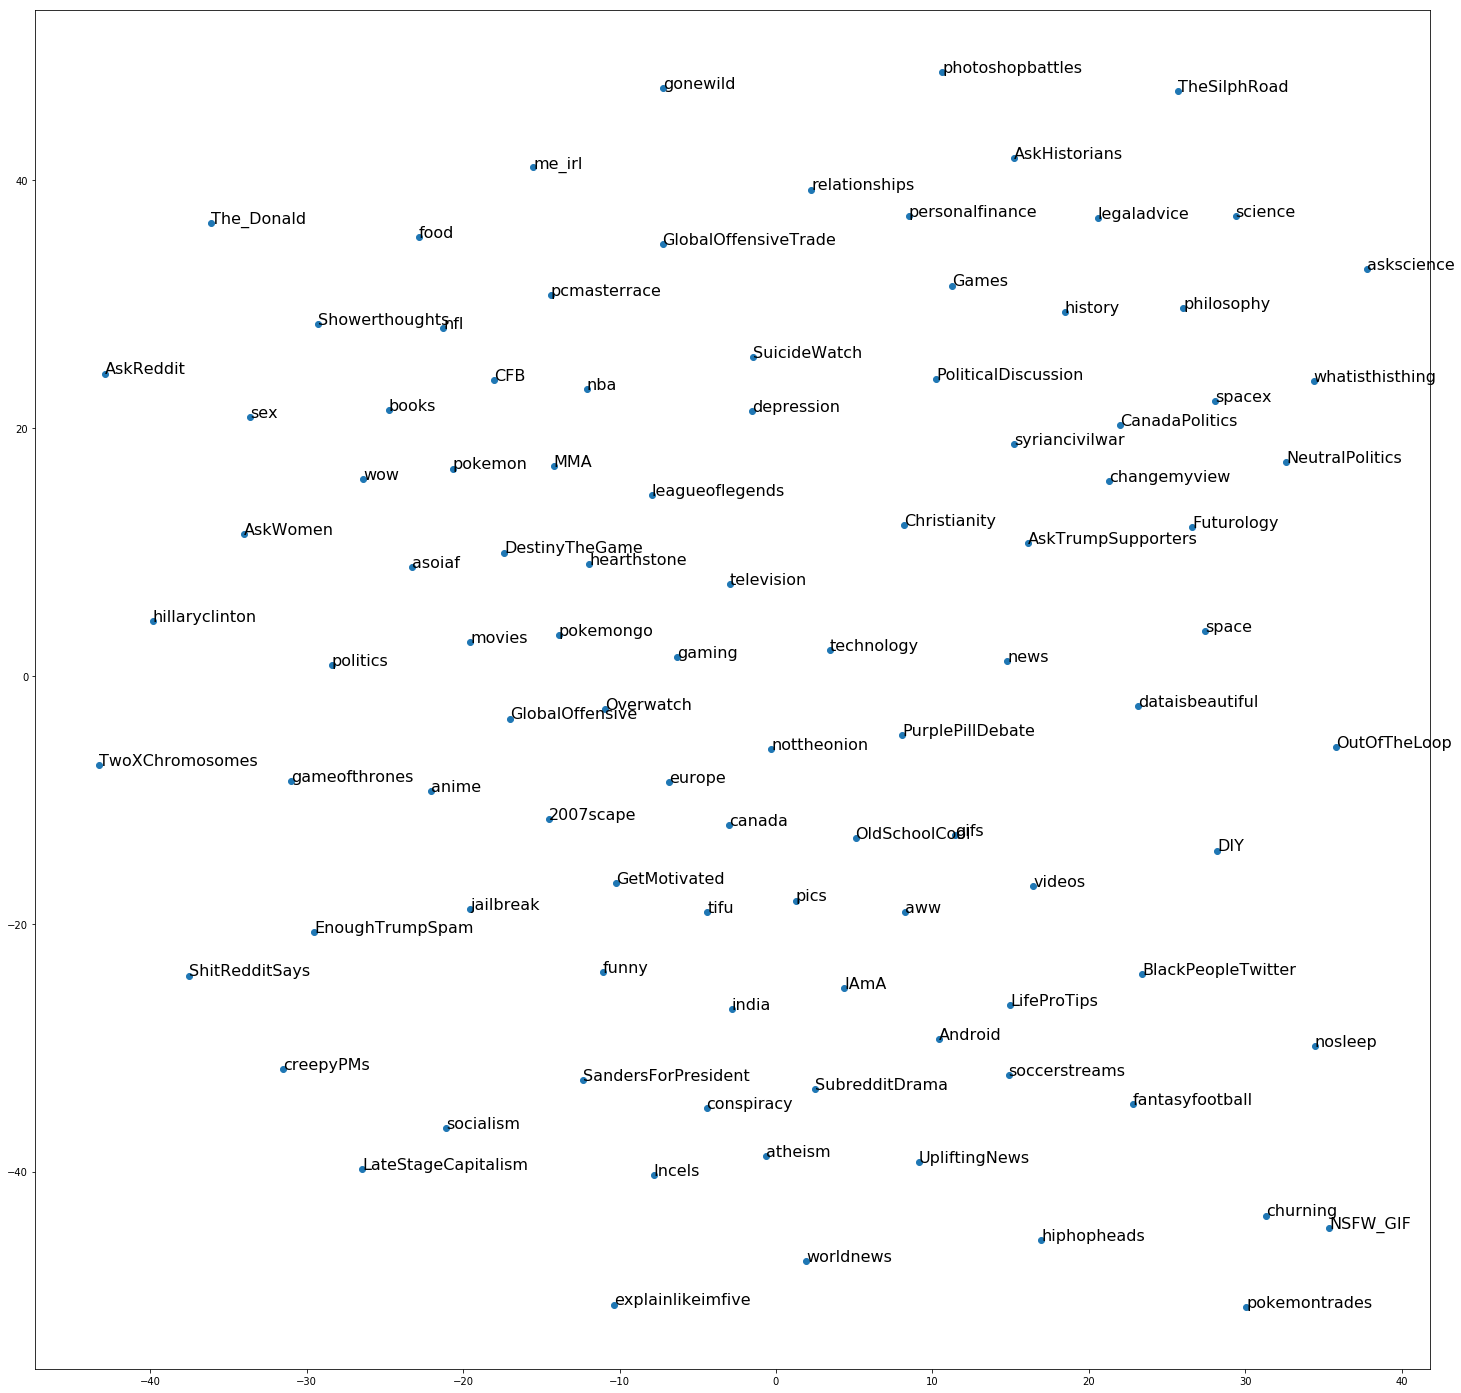

In [4]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, Isomap

# tsvd = TruncatedSVD()
# proj = tsvd.fit_transform(res)

# iso = Isomap()
# proj = iso.fit_transform(res)

tsne = TSNE()
proj = tsne.fit_transform(res)

fig = plt.figure(figsize=(25, 25))
gca().scatter(proj[:,0], proj[:,1])
for label, (x, y) in zip(column_names, proj):
    t = gca().text(x, y, label,
#         t = plt.text(x+np.random.normal(), y+np.random.normal()*2, label,
        fontdict={'weight': 'regular', 'size': 16}, )




In [5]:
import community #python-louvain
import networkx as nx

G = nx.Graph(name='agreement')

res = pickle.load(open('../agreement_top100_english.p', 'rb'))
for i in range(len(res)):
    for j in range(i+1, len(res)):
        G.add_edge(column_names[i],column_names[j],weight=res[i,j])


partition = community.best_partition(G, resolution=.92) #<--- this is the param you want to tweak

size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()):
    count = count + 1.

    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    
    print list_nodes

Populating the interactive namespace from numpy and matplotlib
['asoiaf', 'nfl', 'MMA', 'CFB', 'nba']
['PurplePillDebate', 'canada', 'atheism']
['PoliticalDiscussion', 'spacex', 'syriancivilwar', 'AskHistorians', 'NeutralPolitics', 'science', 'history', 'whatisthisthing', 'changemyview', 'space', 'Futurology', 'philosophy', 'legaladvice', 'Games', 'CanadaPolitics', 'personalfinance']
['dataisbeautiful', 'fantasyfootball']
['relationships', 'photoshopbattles', 'food', 'gonewild', 'pcmasterrace', 'GlobalOffensiveTrade', 'me_irl']
['GlobalOffensive']
['Showerthoughts']
['jailbreak', '2007scape']
['churning', 'tifu', 'hiphopheads', 'explainlikeimfive', 'gifs', 'NSFW_GIF', 'BlackPeopleTwitter', 'Incels', 'videos', 'Android', 'IAmA', 'conspiracy', 'pokemontrades', 'OldSchoolCool', 'pics', 'nosleep']
['UpliftingNews']
['EnoughTrumpSpam', 'creepyPMs', 'The_Donald', 'AskWomen', 'ShitRedditSays', 'LateStageCapitalism', 'hillaryclinton']
['AskReddit', 'news']
['socialism', 'SubredditDrama']
['pok